[View in Colaboratory](https://colab.research.google.com/github/mainanick/kenya-trade-eda/blob/master/trade.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

In [0]:
conn = sqlite3.connect("/content/gdrive/My Drive/db.sqlite3")

In [0]:
__ORIGINAL_QUERY__ = 'SELECT "trade_countrytrade"."id", "trade_countrytrade"."product_id", "trade_countrytrade"."import_val", "trade_countrytrade"."export_val", "trade_countrytrade"."year", "trade_countryiso3"."id" AS country_id, "trade_countryiso3"."name" AS country_name, "trade_countryiso3"."code" AS country_code, "trade_hs07"."name" AS product_name, "trade_hs07"."code" AS product_code FROM "trade_countrytrade" INNER JOIN "trade_countryiso3" ON ("trade_countrytrade"."destination_id" = "trade_countryiso3"."id") INNER JOIN "trade_hs07" ON ("trade_countrytrade"."product_id" = "trade_hs07"."id") WHERE "trade_countrytrade"."year" IN (2016) ORDER BY "trade_countrytrade"."year" DESC LIMIT 5;'
__QUERY__ = 'SELECT "trade_countrytrade"."id", "trade_countrytrade"."product_id", "trade_countrytrade"."import_val", "trade_countrytrade"."export_val", "trade_countrytrade"."year", "trade_countryiso3"."id" AS country_id, "trade_countryiso3"."name" AS country_name, "trade_countryiso3"."code" AS country_code, "trade_hs07"."name" AS product_name, "trade_hs07"."code" AS product_code FROM "trade_countrytrade" INNER JOIN "trade_countryiso3" ON ("trade_countrytrade"."destination_id" = "trade_countryiso3"."id") INNER JOIN "trade_hs07" ON ("trade_countrytrade"."product_id" = "trade_hs07"."id") WHERE "trade_countrytrade"."year" IN ({year}) ORDER BY "trade_countrytrade"."year" DESC;'

def get_query_by_year(_year):
  return __QUERY__.format(year=", ".join(_year))

In [0]:
df = pd.read_sql_query(get_query_by_year(["2016"]), conn)

In [164]:
df.dtypes
df[['import_val','export_val']] = df[['import_val','export_val']].apply(pd.to_numeric)
# df.head()
df

,id,product_id,import_val,export_val,year,country_id,country_name,country_code,product_name,product_code
0,1,282,0.0,144335.00,2016,6,Albania,ALB,Cut flowers and flower buds of a kind suitable...,020603
1,2,283,0.0,122935.00,2016,6,Albania,ALB,Fresh roses,02060311
2,3,287,0.0,21400.00,2016,6,Albania,ALB,Cut flowers & flower buds of a kind suit. for ...,02060319
3,4,2,7080.0,0.00,2016,8,United Arab Emirates,ARE,"Live horses, asses, mules and hinnies.",010101
4,5,3,4357.0,0.00,2016,8,United Arab Emirates,ARE,Live horses/asses/mules/hinnies: pure-bred bre...,01010110
5,6,4,2723.0,0.00,2016,8,United Arab Emirates,ARE,Live horses/asses/mules/hinnies other than pur...,01010190
6,7,12,129557.0,0.00,2016,8,United Arab Emirates,ARE,Live sheep and goats.,010104
7,8,14,129557.0,0.00,2016,8,United Arab Emirates,ARE,Live goats,01010420
8,9,21,1225.0,0.00,2016,8,United Arab Emirates,ARE,Other live animals.,010106
9,10,24,1225.0,0.00,2016,8,United Arab Emirates,ARE,"Live mammals, n.e.s.",01010619


**Total Export To Kenya/Country**

In [0]:
total_exports = df.groupby(["country_name"], sort=True)["export_val"].sum()

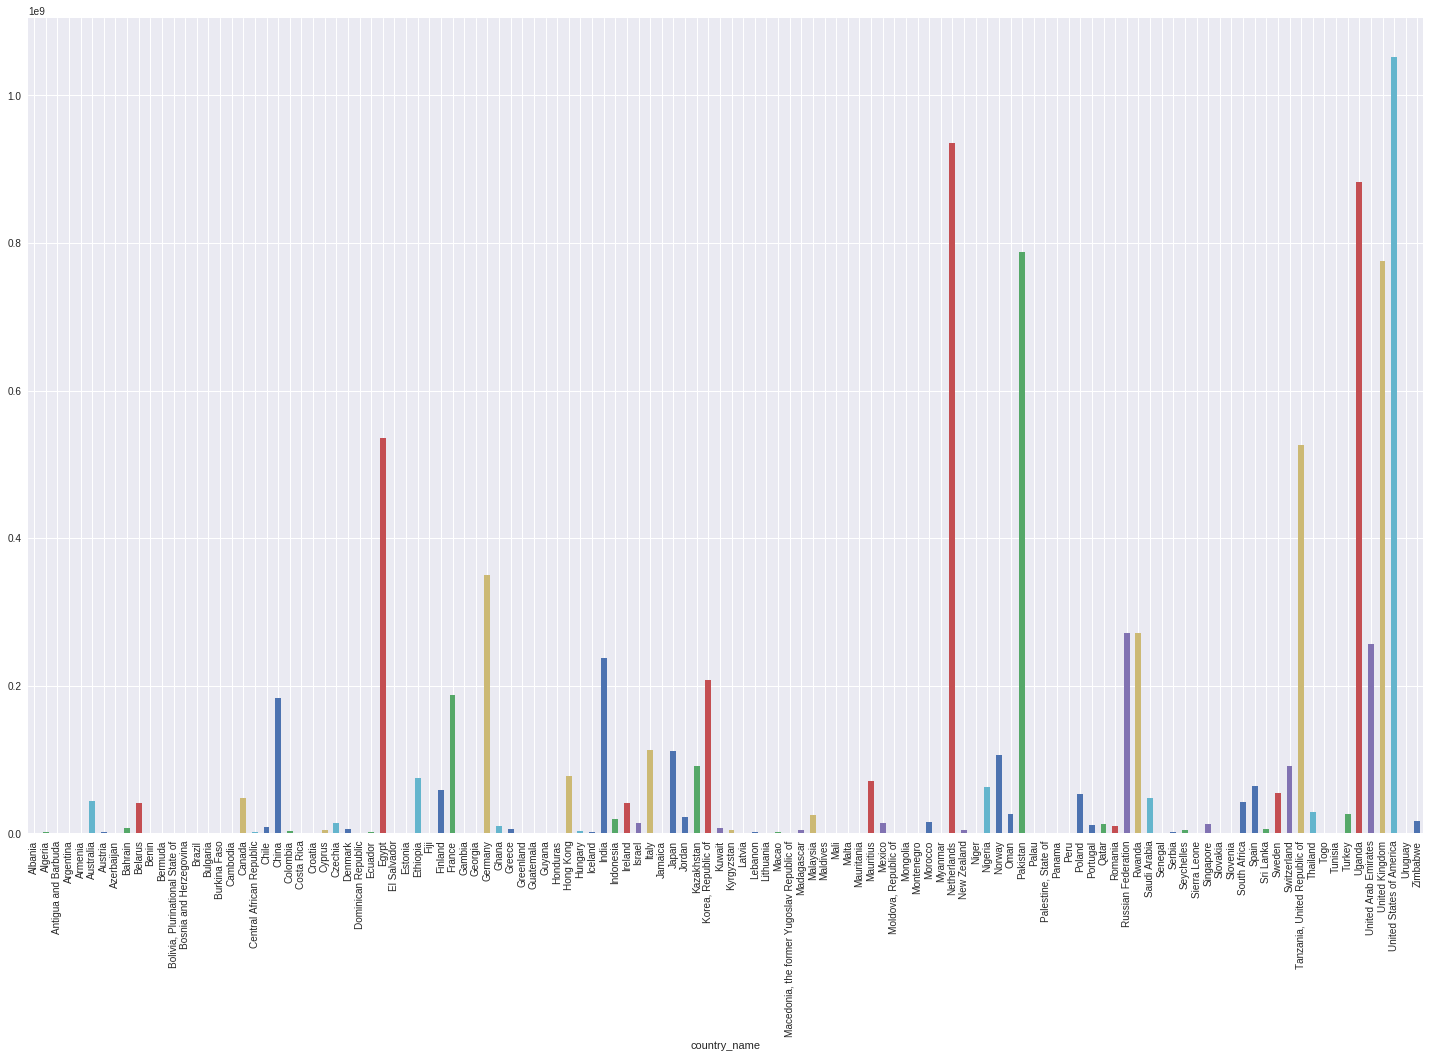

In [163]:
total_exports.plot(x="country_id", y="export_val", figsize=(25, 15), kind="bar")

**Total Import/Country**

In [161]:
total_imports = df.groupby(["country_name"], sort=True)["import_val"].sum()
total_imports

country_name
Albania                            0.000000e+00
Algeria                            6.786630e+06
Antigua and Barbuda                0.000000e+00
Argentina                          4.694032e+07
Armenia                            3.652800e+04
Australia                          9.444283e+07
Austria                            3.741336e+07
Azerbaijan                         8.298000e+03
Bahrain                            1.716787e+08
Belarus                            3.789600e+06
Benin                              2.024824e+06
Bermuda                            0.000000e+00
Bolivia, Plurinational State of    0.000000e+00
Bosnia and Herzegovina             2.919800e+04
Brazil                             1.177439e+08
Bulgaria                           8.647804e+06
Burkina Faso                       4.888200e+04
Cambodia                           3.090940e+05
Canada                             1.488075e+08
Central African Republic           0.000000e+00
Chile                      

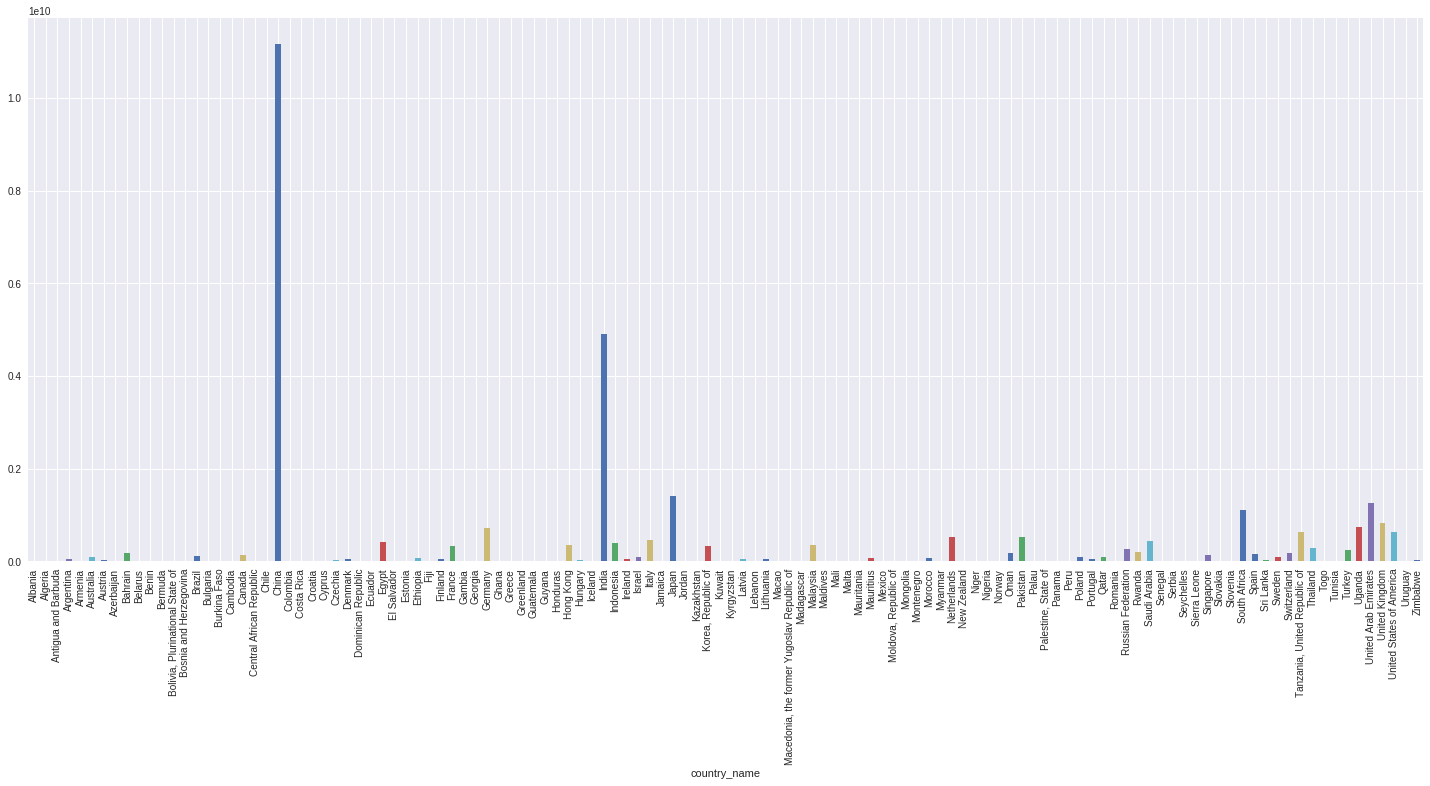

In [162]:
total_imports.plot(x="country_id", y="import_val", figsize=(25, 10), kind="bar")

In [0]:
totalimport_by_product_country = df.sort_values(by=["product_name", "import_val", "country_name"], ascending=[True, False, False])

In [189]:
totalimport_by_product_country[["product_name" , "country_name", "import_val"]]

,product_name,country_name,import_val
8530,- Portable automatic data processing machines...,China,60020771.0
20512,- Portable automatic data processing machines...,Hong Kong,8046956.0
35141,- Portable automatic data processing machines...,Portugal,2589276.0
1770,- Portable automatic data processing machines...,United Arab Emirates,2441634.0
47190,- Portable automatic data processing machines...,United States of America,1408584.0
18958,- Portable automatic data processing machines...,United Kingdom,1063881.0
49947,- Portable automatic data processing machines...,South Africa,943501.0
9734,- Portable automatic data processing machines...,Czechia,500610.0
12647,- Portable automatic data processing machines...,Denmark,490454.0
11668,- Portable automatic data processing machines...,Germany,305551.0
